In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

Загрузим таблицу с ИПЦ

In [2]:
cpi = pd.read_csv('russia.index.cpi (statbureau.org).csv')

In [3]:
new_cpi = cpi[-5:].reset_index(drop= True).copy()
new_cpi.head()

,Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
0,2019,101.01,100.44,100.32,100.29,100.34,100.04,100.20,99.76,99.84,100.13,100.28,100.36
1,2020,100.40,100.33,100.55,100.83,100.27,100.22,100.35,99.96,99.93,100.43,100.71,100.83
2,2021,100.67,100.78,100.66,100.58,100.74,100.69,100.31,100.17,100.60,101.11,100.96,100.82
3,2022,100.99,101.17,107.61,101.56,100.12,99.65,99.61,99.48,100.05,100.18,100.37,100.78
4,2023,100.84,100.46,100.37,100.38,100.31,100.37,100.63,100.28,100.87,100.83,NaN,NaN


In [35]:
cpi_in_column = new_cpi.set_index(0).stack().to_frame(name = 'cpi')
cpi_in_column.reset_index(inplace= True)
cpi_in_column.rename(columns={0:'year_', 'level_1':'month_'}, inplace=True)
cpi_in_column.head()

,year_,month_,cpi
0,2019,1,101.01
1,2019,2,100.44
2,2019,3,100.32
3,2019,4,100.29
4,2019,5,100.34


Загрузим таблицу с курсом доллара

In [6]:
usd_rub = pd.read_excel('RC_F30_11_2018_T02_12_2023.xlsx')

In [7]:
usd_rub.sort_values(by = 'data', ascending=True).head()

,nominal,data,curs,cdx
1233,1,2018-11-30,66.6342,Доллар США
1232,1,2018-12-01,66.5335,Доллар США
1231,1,2018-12-04,66.2921,Доллар США
1230,1,2018-12-05,66.4467,Доллар США
1229,1,2018-12-06,66.8242,Доллар США


Сгрупируем по месяцам и отсортируем по возрастанию даты

In [8]:
usd_rub['month_'] = usd_rub['data'].dt.month
usd_rub['year_'] = usd_rub['data'].dt.year
new_usd_rub =usd_rub.groupby(["month_", "year_"])["curs"].mean().reset_index()
new_usd_rub.sort_values(by = ['year_', 'month_'], ascending=True, inplace= True)

Пстроим графики: курса доллара (зелёный) и ИПЦ (красный). Видно, что пики и спады совпадают (может с небольшим лагом)

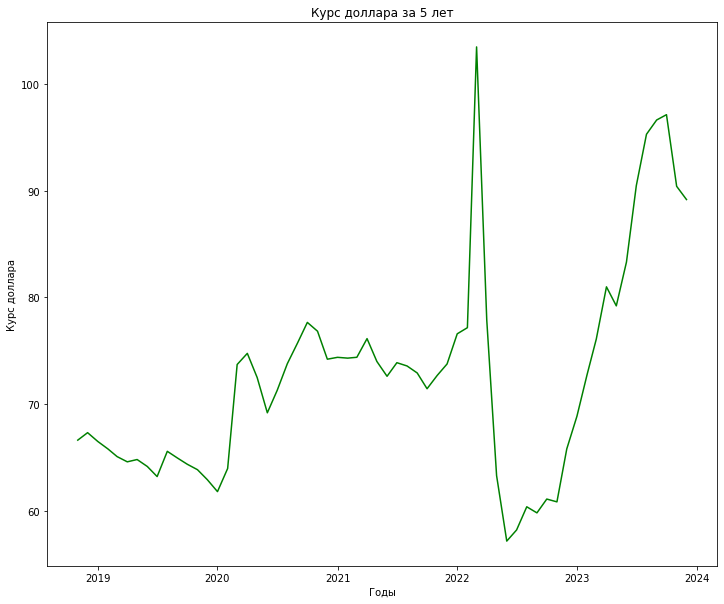

In [58]:
new_usd_rub['date'] = new_usd_rub['month_'].map(str)+ '-' +new_usd_rub['year_'].map(str)
new_usd_rub['date'] = pd.to_datetime(new_usd_rub['date'], format='%m-%Y')
plt.title('Курс доллара за 5 лет')
plt.xlabel('Годы')
plt.ylabel('Курс доллара')
plt.plot_date(new_usd_rub['date'], new_usd_rub['curs'], fmt='-g')

plt.show()

Курс доллара немного подрос в 2020 году - следствие снижение цен на нефть. Резкий рост курс в начеле 2022 - следствие начала войны с Украиной и последоввавших санкций, что привело к резком оттоку капитала. Далее, к середине 2022 года - стремительное снижение до ок 55 руб. за доллар. Причины снижения: меры ЦБ и правительства (ограничение движения капитала, обязательная конвертация валютной выручки, повышение ключевой ставки), а также рост цен на нефть из-за планируемых ограничений на покупку российской нефти. С середины лета 2022 года и до ноября 2023 - рост курса из-за ностепенного снятия ограничений на движение капиатала и продажу валютной выручки, снидение ключевой ставки, восстановления импорта и бюджетного импульса, а также политических событий внутри России - мобилизация, мятеж Пригожина. В ноябре - декабре 2023 года - снижение курса из-за новых ограничений в части продажи валютной выручки, а также эффекта от повышения ключевой ставки

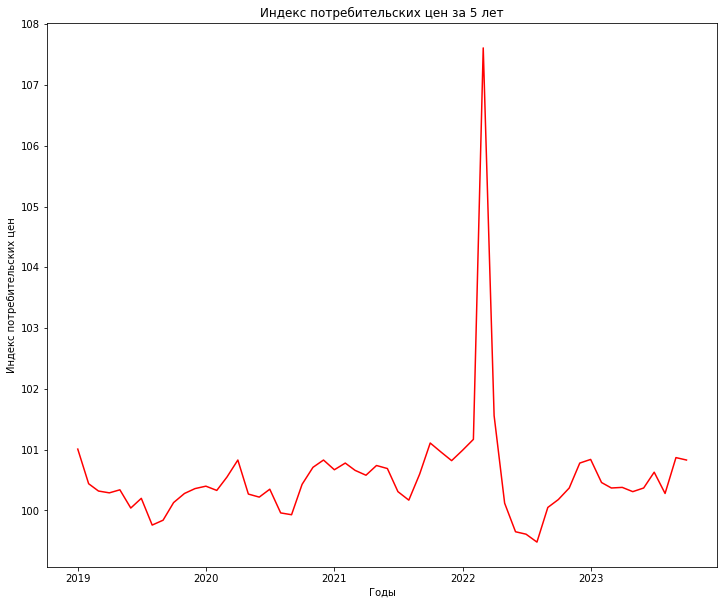

In [49]:
cpi_in_column.dropna(inplace=True, how='any')
cpi_in_column['date'] = cpi_in_column['month_'].map(str)+ '-' +cpi_in_column['year_'].map(str)
cpi_in_column['date'] = pd.to_datetime(cpi_in_column['date'], format='%m-%Y')
plt.title('Индекс потребительских цен за 5 лет')
plt.xlabel('Годы')
plt.ylabel('Индекс потребительских цен')
plt.plot_date(cpi_in_column['date'], cpi_in_column['cpi'], fmt='-r')
plt.show()

График ИПЦ не такой волатильный, как график курса - ИПЦ большую часть периода колеблется от 99 до 101, но есть и яркий пик весной 2022 года. Он вызван девальвацией, ограничениями на импорт и, возмодно, прекращением работы отдельных предприятий (например, автопром), вследстиве санкций. В на грацике проселживается сезонность - цены растут медленнее к концу лета - началу осени (цены на продукты снижаются из-за урожая), и растут быстрее к концу года - денежной массы больше к концу года - бюджетный цикл, премии.